<a href="https://colab.research.google.com/github/Joshuamaximo12/ac-joshua/blob/main/Ejercicios_de_las_tortugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2023-04-09 20:42:22 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  541.769 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


In [ ]:
# Importamos la biblioteca "Pkg" para poder instalar "paquetes" (blbiotecas);
using Pkg

# luego, instalamos la biblioteca "ThinkJulia".
Pkg.add(url="https://github.com/BenLauwens/ThinkJulia.jl")

     Cloning git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating git-repo `https://github.com/BenLauwens/ThinkJulia.jl`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed FFMPEG ──────────────────── v0.3.0
   Installed IrrationalConstants ─────── v0.1.1
   Installed x265_jll ────────────────── v3.5.0+0
   Installed Showoff ─────────────────── v0.3.2
   Installed JpegTurbo_jll ───────────── v2.1.91+0
   Installed ColorTypes ──────────────── v0.9.1
   Installed Adapt ───────────────────── v3.6.1
   Installed libfdk_aac_jll ──────────── v2.0.2+0
   Installed TikzPictures ────────────── v3.4.2
   Installed GeometryTypes ───────────── v0.8.5
   Installed Plots ───────────────────── v1.0.14
   Installed OffsetArrays ────────────── v1.12.9
   Installed ImageCore ───────────────── v0.8.22
   Installed Graphite2_jll ───────────── v1.3.14+0
   Installed libass_jll ──────────────── v0.15.1+0
   Installed Libmount_jll ─────────

In [ ]:
using ThinkJulia                                           # Importamos la biblioteca "ThinkJulia".

#= NOTA: Después de instalar la biblioteca "ThinkJulia" localmente en tu computadora, podrás importarla sin tener que
volverla a instalar; por ende, recomendamos comentar la celda de código anterior después de la instalación inicial,
pues ya no será necesaria =#

[ Info: Precompiling ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29]
[ Info: Skipping precompilation since __precompile__(false). Importing ThinkJulia [a7f2b756-c18b-4c7f-87da-faca9ac81b29].


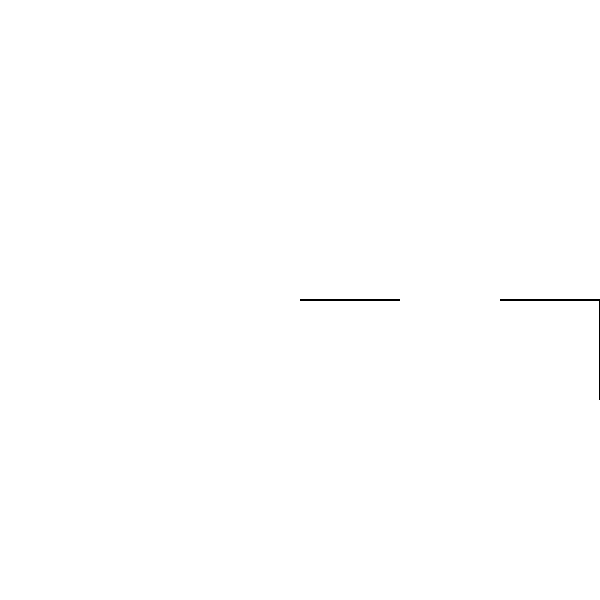

In [ ]:
using ThinkJulia 

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 100

@svg begin           # '@svg' toma las instrucciones dentro del bloque `begin` y genera un svg con ellas, que Jupyter nos muestra
    forward(🐢,d)   #'forward' hace que se dibuje hacia adelante una línea de longitud d=100
    penup(🐢)       # 'penup' hace que la tortuga haga un brinco o mejor dicho, deje un espacio en blanco, es decir, que levante la pluma del papel
    forward(🐢,d)   
    pendown(🐢)     # al comentar 'pendown' lo que provocó es que bajara la pluma sobre el papel
    forward(🐢,d)
    turn(🐢, 90)    # 'turn' hace que la tortuga gire 90 grados hacia abajo
    forward(🐢,d)
end

**Ejercicio** Dibuja una linea punteada con 5 lineas negras de 10 unidades de distancia entre ellas. (Sugerencia: copia el código de la celda anterior y modificalo a tu conveniencia.)

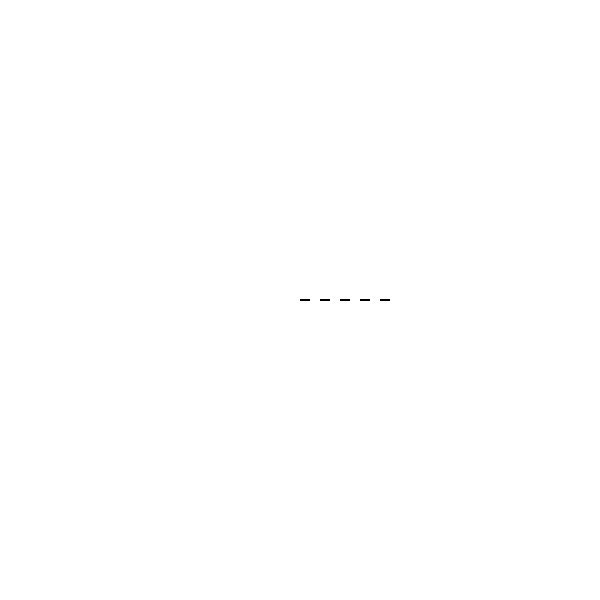

In [ ]:
using ThinkJulia 

🐢 = Turtle() #Inicializamos nuestra tortuga en el origen del plano.

d = 10

@svg begin           
    forward(🐢,d)   
    penup(🐢)       
    forward(🐢,d) 
    pendown(🐢) 
    forward(🐢,d) 
    penup(🐢)
    forward(🐢,d)
    pendown(🐢)
    forward(🐢,d) 
    penup(🐢)
    forward(🐢,d)
    pendown(🐢)
    forward(🐢,d) 
    penup(🐢)
    forward(🐢,d)
    pendown(🐢)
    forward(🐢,d)

end
#Lo primero que se hizo con los comandos fue que la tortuga caminara en linea recta con 'forward' una distancia d=10 unidades, luego que levantara la pluma con 'penup' para que dejara 
#de escribir durante d=10 unidades, posteriomente volver a que caminara la tortuga otra vez se utilizó 'forward' pero para ello fue necesario darle la instrucción que bajara 
#la pluma con 'pendown'. Este proceso se repitió 5 veces y se finalizó con un 'forward'.

**Ejercicio** Si no utilizaste un ciclo para resolver el ejercicio anterior, reescribe tu programa utilizando un ciclo `for` o `while`.

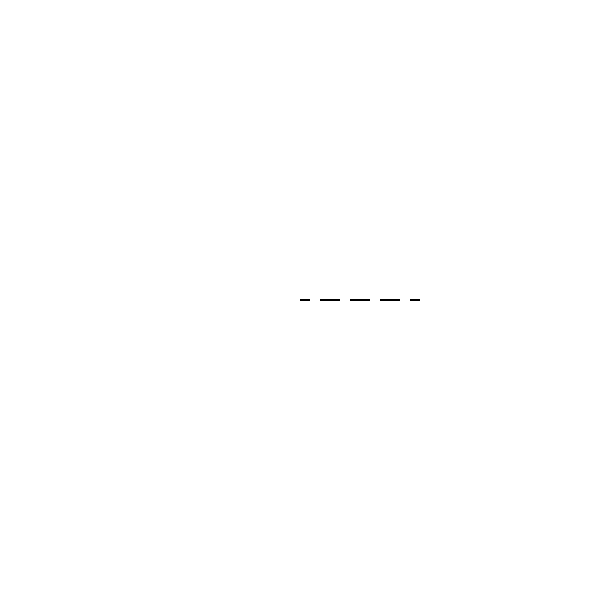

In [ ]:
#Sí utilicé un ciclo para resolver el ejercicio anterior, pero creo que se puede hacer empleando lo siguiente.

using ThinkJulia

🐢 = Turtle()

d=10

@svg begin
    for i in 1:4
    forward(🐢,d)
    penup(🐢)       
    forward(🐢,d) 
    pendown(🐢)
    forward(🐢,d)
    end
end
# Es extraño que si haya dibujado las lineas punteadas, pero los espacioes entre líneas son más cortos.

**Ejercicio** Haz un programa que tome tres parámetros `n`, `d1` y `d2`(los cuales pueden definir como variables en la misma celda) y dibuje `n`lineas de longitud `d1`con una distancia de separación `d2`entre ellas utilizando un `ciclo` for o `while`.

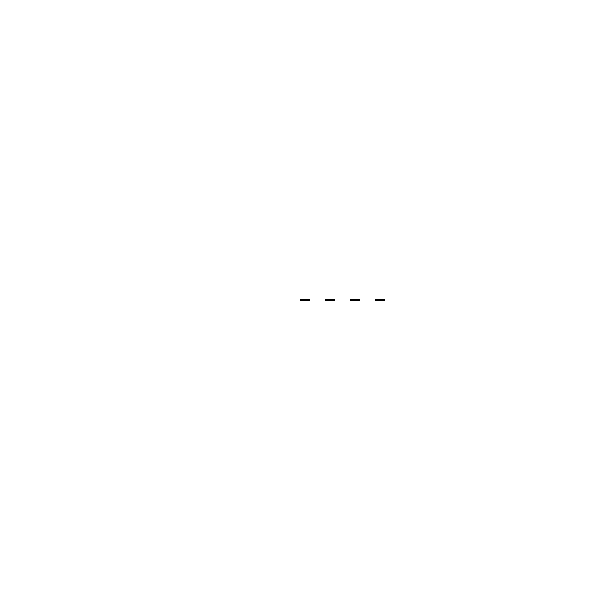

In [ ]:
using ThinkJulia

# Inicializamos nuestra tortuga en el origen del plano
🐢 = Turtle()

d1 = 10 #longitud de lineas
d2 = 15 #separacion entre lineas
n = 4 #numero de lineas

# Creamos un bloque 'begin' para darle instrucciones a nuestra tortuga
@svg begin
    while n >= 1  #mientras n sea mayor o igual a 1 se ejecuta el ciclo
    
 forward(🐢,d1) #la tortuga avanza con el lapiz abajo la distancia d1
 penup(🐢)      #la tortuga levanta el lapiz 
 forward(🐢,d2)  #la tortuga avanza con el lapiz levantado una distancia d2
 pendown(🐢)     #la tortuga baja el lapiz



 n-=1   #el valor n disminuye para que se cumpla que llegue a ser igual a 1, donde el ciclo se detiene
end
end
  
    

**Ejercicio** Haz un programa que dibuje un triangulo equilátero.

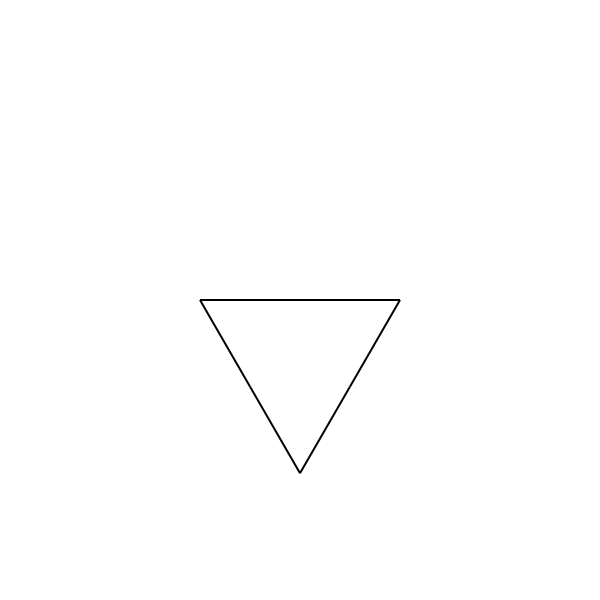

In [ ]:
using ThinkJulia

🐢 = Turtle()

d=100

@svg begin
    for i in 1:3    #Aquí si i va desde 1 hasta 3, dibuja todo el triangulo, si i>=3 sigue dibujando el triangulo, la i dice cuantas veces se tiene que repetir el ciclo.
    forward(🐢,d)  #por otra parte para formar al trinagulo, tuvo que moverse 120 grados la tortuga y a partir de eso punto moverse otros 120 grados para cerrar el triangulo. 
    turn(🐢, 120)      
    forward(🐢,d)
    end
end

**Ejercicio** Generaliza el programa anterior a uno que tome dos parámetros `n`y `d`y dibuje un polígono regular de `n`lados de longitud `d` utilizando ciclo for o while.

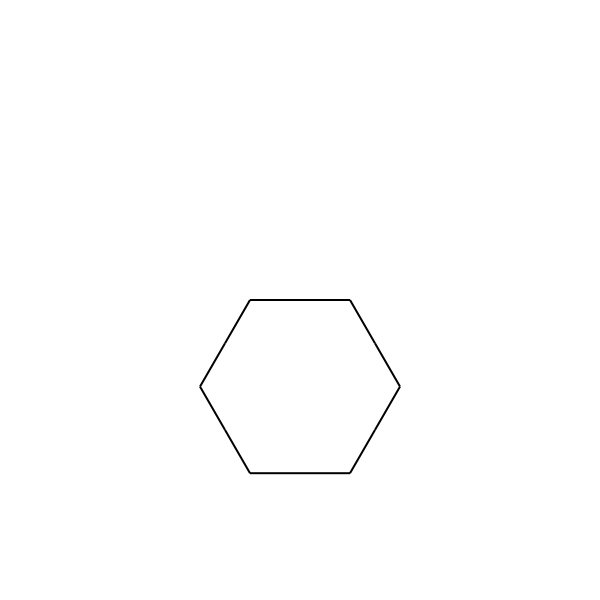

In [ ]:
using ThinkJulia

🐢 = Turtle()

d=50
n=6
@svg begin
    for i in 1:n    
    forward(🐢,d)  
    turn(🐢, 60)      
    forward(🐢,d)
    end
end

#En este caso d será la longitud de los lados del polígono, por otra parte la relación entre el ángulo de un polígono con el número de lados es (360°/n)=°grados,
#donde n es la cantidad de lados, así pues si se quiere un póligo de 6 lados, entonces los ángulos a su interior serán 60°.

###Tortugas y fractales
Podemos utilizar ciclos recursivos para dibujar fractales (o al menos una linda aproximación de ellos) con ayuda de nuestra amiga tortuga.

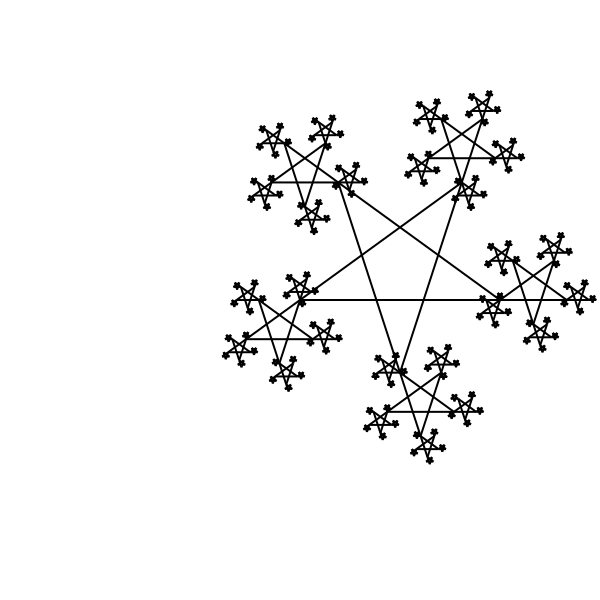

In [ ]:
using ThinkJulia

function estrella(tort,dist)
    if dist <= 5
         return
    else 
       for i in 1:5
           forward(tort,dist)
           estrella(tort, dist/3)
           turn(tort,216)
      end
    end
end


 🐢= Turtle() #Inicializamos nuestra tortuga en el origen del plano.

 d=200

 @svg estrella(🐢,d)
          


**Ejercicio** Crea un fractal con un ciclo recursivo 

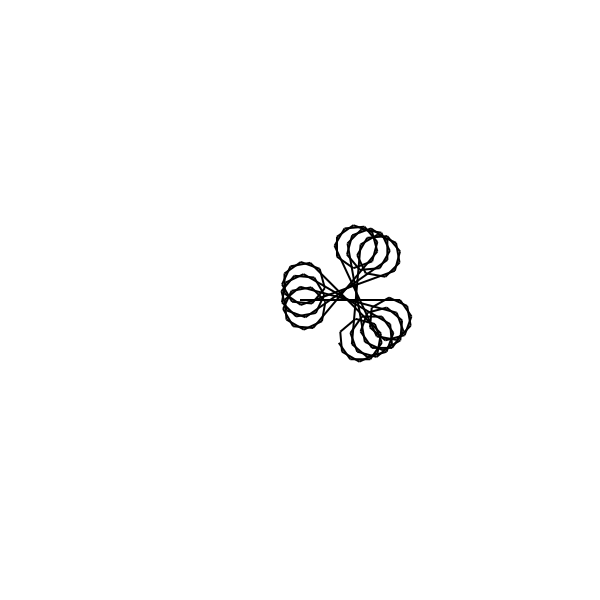

In [ ]:
using ThinkJulia

function fractal(tort,dist)
    if dist <= 5
         return
    else 
       for i in 1:10
           forward(tort,dist)
           turn(tort,55)
           fractal(tort, dist/5)
           
      end
    end
end


 🐢= Turtle() #Inicializamos nuestra tortuga en el origen del plano.

 d=100

 @svg fractal(🐢,d)

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />